In [1]:
import requests
import pandas as pd
import numpy as np
def financial_statement(year, season, type='綜合損益彙總表'):
    if year >= 1000:
        year -= 1911
        
    if type == '綜合損益彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb04'
    elif type == '資產負債彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb05'
    elif type == '營益分析彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb06'
    else:
        print('type does not match')
    r = requests.post(url, {
        'encodeURIComponent':1,
        'step':1,
        'firstin':1,
        'off':1,
        'TYPEK':'sii',
        'year':'103',
        'season':'01',
    })
    
    r.encoding = 'utf8'
    dfs = pd.read_html(r.text)
    
    
    for i, df in enumerate(dfs):
        df.columns = df.iloc[0]
        dfs[i] = df.iloc[1:]
        
    df = pd.concat(dfs).applymap(lambda x: x if x != '--' else np.nan)
    df = df[df['公司代號'] != '公司代號']
    df = df[~df['公司代號'].isnull()]
    return df

In [2]:
df = financial_statement(107, 2, '營益分析彙總表')
df = df.drop(['合計：共 808 家'], axis=1).set_index(['公司名稱']).astype(float)

In [3]:
df.loc['台積電']

公司代號                       2330.00
毛利率(%)(營業毛利)/(營業收入)          47.50
營業利益率(%)(營業利益)/(營業收入)        35.44
營業收入(百萬元)                148215.17
稅前純益率(%)(稅前純益)/(營業收入)        35.96
稅後純益率(%)(稅後純益)/(營業收入)        32.28
Name: 台積電, dtype: float64

In [4]:
df.loc[['台積電', '聯發科']]

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
公司名稱,,,,,,
台積電,2330.0,47.50,35.44,148215.17,35.96,32.28
聯發科,2454.0,48.31,23.50,46005.00,25.00,22.04


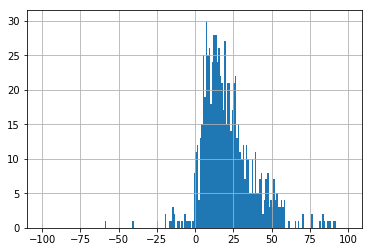

In [6]:
%matplotlib inline
df['毛利率(%)(營業毛利)/(營業收入)'].astype(float).hist(bins=range(-100,100))

In [5]:
cond1 = df['毛利率(%)(營業毛利)/(營業收入)'].astype(float) > 20
cond2 = df['營業利益率(%)(營業利益)/(營業收入)'].astype(float) > 5

df[cond1 & cond2]

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
公司名稱,,,,,,
信大水泥,1109.0,21.81,11.85,1192.02,11.41,8.98
味全公司,1201.0,31.15,6.00,6611.78,4.88,3.60
味王公司,1203.0,25.31,11.82,1498.95,11.76,8.53
統一,1216.0,31.44,5.09,108631.63,7.10,6.02
佳格,1227.0,26.82,12.26,5307.08,12.36,10.22
天仁,1233.0,61.39,15.91,556.67,18.01,15.19
鮮活果汁-KY,1256.0,31.34,20.03,431.75,20.00,13.14
綠悅-KY,1262.0,33.99,28.64,1528.95,30.08,22.98
三芳化工,1307.0,25.08,9.86,2825.94,10.82,9.37
